### Notebook 16: Simulating RADseq data
#### Eaton et al. 2015

In [22]:
## Requirements
##   - Python 2.7
##   - pyrad v.3.1.0   (http://github.com/dereneaton/pyrad)
##   - simrrls v.0.0.7 (http://github.com/dereneaton/simrrls)

In [150]:
import itertools
import ete2
import numpy as np
import toyplot
from collections import OrderedDict, Counter

### Generate trees for simulations
Make a balanced tree with 64 tips and a tree length = 10

In [151]:
for n, node in enumerate(Tbal.get_leaves()):
    node.name = "t"+str(n)    

In [152]:
print Tbal.write()

((((((t0:1.66667,t1:1.66667)1:1.66667,(t2:1.66667,t3:1.66667)1:1.66667)1:1.66667,((t4:1.66667,t5:1.66667)1:1.66667,(t6:1.66667,t7:1.66667)1:1.66667)1:1.66667)1:1.66667,(((t8:1.66667,t9:1.66667)1:1.66667,(t10:1.66667,t11:1.66667)1:1.66667)1:1.66667,((t12:1.66667,t13:1.66667)1:1.66667,(t14:1.66667,t15:1.66667)1:1.66667)1:1.66667)1:1.66667)1:1.66667,((((t16:1.66667,t17:1.66667)1:1.66667,(t18:1.66667,t19:1.66667)1:1.66667)1:1.66667,((t20:1.66667,t21:1.66667)1:1.66667,(t22:1.66667,t23:1.66667)1:1.66667)1:1.66667)1:1.66667,(((t24:1.66667,t25:1.66667)1:1.66667,(t26:1.66667,t27:1.66667)1:1.66667)1:1.66667,((t28:1.66667,t29:1.66667)1:1.66667,(t30:1.66667,t31:1.66667)1:1.66667)1:1.66667)1:1.66667)1:1.66667)1:1.66667,(((((t32:1.66667,t33:1.66667)1:1.66667,(t34:1.66667,t35:1.66667)1:1.66667)1:1.66667,((t36:1.66667,t37:1.66667)1:1.66667,(t38:1.66667,t39:1.66667)1:1.66667)1:1.66667)1:1.66667,(((t40:1.66667,t41:1.66667)1:1.66667,(t42:1.66667,t43:1.66667)1:1.66667)1:1.66667,((t44:1.66667,t45:1.66667)1

In [153]:
## base tree
Tbal = ete2.Tree()

## branch lengths
bls = 10/6.

## first nodes
n1 = Tbal.add_child(dist=bls)
n2 = Tbal.add_child(dist=bls)

## make balanced tree
while len(Tbal.get_leaves()) < 64:
    thisrep = Tbal.get_descendants()
    for node in thisrep:
        if len(node.get_children()) < 1:
            node.add_child(dist=bls)
            node.add_child(dist=bls)

## set leaf names
for n, node in enumerate(Tbal.get_leaves()):
    node.name = "t"+str(n)    
    
## Save newick string to file
Tbal.write(outfile="Tbal.tre", format=3)

In [154]:
cat Tbal.tre

((((((t0:1.66667,t1:1.66667)NoName:1.66667,(t2:1.66667,t3:1.66667)NoName:1.66667)NoName:1.66667,((t4:1.66667,t5:1.66667)NoName:1.66667,(t6:1.66667,t7:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667,(((t8:1.66667,t9:1.66667)NoName:1.66667,(t10:1.66667,t11:1.66667)NoName:1.66667)NoName:1.66667,((t12:1.66667,t13:1.66667)NoName:1.66667,(t14:1.66667,t15:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667,((((t16:1.66667,t17:1.66667)NoName:1.66667,(t18:1.66667,t19:1.66667)NoName:1.66667)NoName:1.66667,((t20:1.66667,t21:1.66667)NoName:1.66667,(t22:1.66667,t23:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667,(((t24:1.66667,t25:1.66667)NoName:1.66667,(t26:1.66667,t27:1.66667)NoName:1.66667)NoName:1.66667,((t28:1.66667,t29:1.66667)NoName:1.66667,(t30:1.66667,t31:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667)NoName:1.66667,(((((t32:1.66667,t33:1.66667)NoName:1.66667,(t34:1.66667,t35:1.66667)NoName:1.66667)NoName:1.66667,((t36:1.66667,t37:1.66667)NoNa

### Make an imbalanced tree of the same total tree length with 64 tips

In [155]:
## base tree
Timb = ete2.Tree()

## scale branches to match balanced treelength
brlen = (bls*6.)/63

## first nodes
n1 = Timb.add_child(dist=brlen)
n2 = Timb.add_child(dist=brlen)

while len(Timb.get_leaves()) < 64:  
    ## extend others
    for tip in Timb.get_leaves()[:-1]:
        tip.dist += brlen
    ## extend the last node
    Timb.get_leaves()[-1].add_child(dist=brlen)
    Timb.get_leaves()[-1].add_sister(dist=brlen)

## set leaf names
for n, node in enumerate(Timb.get_leaves()):
    node.name = "t"+str(n)    
    
## write to file
Timb.write(outfile="Timb.tre", format=3)

In [156]:
cat Timb.tre

(t0:10,(t1:9.84127,(t2:9.68254,(t3:9.52381,(t4:9.36508,(t5:9.20635,(t6:9.04762,(t7:8.88889,(t8:8.73016,(t9:8.57143,(t10:8.4127,(t11:8.25397,(t12:8.09524,(t13:7.93651,(t14:7.77778,(t15:7.61905,(t16:7.46032,(t17:7.30159,(t18:7.14286,(t19:6.98413,(t20:6.8254,(t21:6.66667,(t22:6.50794,(t23:6.34921,(t24:6.19048,(t25:6.03175,(t26:5.87302,(t27:5.71429,(t28:5.55556,(t29:5.39683,(t30:5.2381,(t31:5.07937,(t32:4.92063,(t33:4.7619,(t34:4.60317,(t35:4.44444,(t36:4.28571,(t37:4.12698,(t38:3.96825,(t39:3.80952,(t40:3.65079,(t41:3.49206,(t42:3.33333,(t43:3.1746,(t44:3.01587,(t45:2.85714,(t46:2.69841,(t47:2.53968,(t48:2.38095,(t49:2.22222,(t50:2.06349,(t51:1.90476,(t52:1.74603,(t53:1.5873,(t54:1.42857,(t55:1.26984,(t56:1.11111,(t57:0.952381,(t58:0.793651,(t59:0.634921,(t60:0.47619,(t61:0.31746,(t62:0.15873,t63:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:0.15873)NoName:

### Check tree lengths

In [157]:
print set([i.get_distance(Tbal) for i in Tbal]), 'treelength'
print len(Tbal), 'tips'

print set([i.get_distance(Timb) for i in Timb]), 'treelength'
print len(Timb), 'tips'

set([10.0]) treelength
64 tips
set([9.999999999999998]) treelength
64 tips


### Get topology from empirical study of Viburnum with 64 tips
Make tree ultrametric using the penalized likelihood

In [158]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


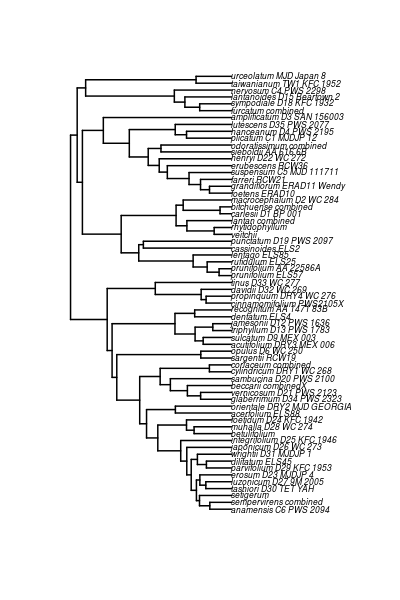

In [159]:
%%R -w 400 -h 600
library(ape)

## make tree ultrametric using penalized likelihood
Vtree <- read.tree("~/Dropbox/RAxML_bestTree.VIB_small_c85d6m4p99")
Utree <- ladderize(chronopl(Vtree, 0.5))
Utree <- drop.tip(Utree, "clemensiae_DRY6_PWS_2135")

## multiply bls so tree length=6
Utree$edge.length <- Utree$edge.length*3

## save the new tree
write.tree(Utree, "Tvib.tre")
plot(Utree, cex=0.7, edge.width=2)
#edgelabels(round(Utree$edge.length,3))

In [160]:
#### load TVib tree into Python and print newick string
Tvib = ete2.Tree("Tvib.tre")
! cat Tvib.tre

(((((((((((((anamensis_C6_PWS_2094:0.2976564833,sempervirens_combined:0.2976564833):0.141895001,setigerum:0.4395514843):0.04243491827,((tashiori_D30_TET_YAH:0.3525423068,luzonicum_D27_9M_2005:0.3525423068):0.08217954946,erosum_D23_MJDJP_4:0.4347218562):0.04726454628):0.07166703939,((parvifolium_D29_KFC_1953:0.3445468166,dilitatum_ELS45:0.3445468166):0.1240260218,wrightii_D31_MJDJP_1:0.4685728384):0.08508060353):0.06099278658,japonicum_D26_WC_273:0.6146462285):0.08345145638,integrifolium_D25_KFC_1946:0.6980976849):0.3154380055,((betulifolium:0.5142650528,muhalla_D28_WC_274:0.5142650528):0.1041896534,foetidum_D24_KFC_1942:0.6184547062):0.3950809842):0.1548603709,(acerfolium_ELS88:0.7716194155,orientale_DRY2_MJD_GEORGIA:0.7716194155):0.3967766459):0.09417177866,((((glaberrimum_D34_PWS_2323:0.4241929153,vernicosum_D21_PWS_2123:0.4241929153):0.1822087602,beccarii_combinedX:0.6064016754):0.2342803007,sambucina_D20_PWS_2100:0.8406819761):0.140414823,(cylindricum_DRY1_WC_268:0.3033948796,coria

# Simulate sequence data on each tree
Here I use the _simrrls_ program to simulate RADseq data on each input topology with locus dropout occurring with respect to phylogenetic distances. Find simrrls in my github profile.

In [161]:
%%bash
## balanced tree 
mkdir -p simulations/Tbal_full/
mkdir -p simulations/Tbal_mut/
mkdir -p simulations/Tbal_cov/

## imbalanced tree
mkdir -p simulations/Timb_full/
mkdir -p simulations/Timb_mut/
mkdir -p simulations/Timb_cov/

## empirical Viburnum tree
mkdir -p simulations/Tvib_full/
mkdir -p simulations/Tvib_mut/
mkdir -p simulations/Tvib_cov/

#### show simrrls options

In [163]:
%%bash
simrrls -h

usage: simrrls [-h] [--version] -o outname [-mc dropout] [-ms dropout] [-e error] [-f datatype] [-I indels]
               [-l length] [-L nLoci] [-n Ninds] [-N Ne] [-t tree] [-u mu] [-df depthfunc] [-dm depthmean]
               [-ds depthstd] [-c1 cut_1] [-c2 cut_2] [-i1 min_insert] [-i2 max_insert] [-r1 seed_1] [-r2 seed_2]

optional arguments:
  -h, --help      show this help message and exit
  --version       show program's version number and exit
  -o outname      [str] output file name prefix (default 'out')
  -mc dropout     [0/1] allelic dropout from mutation to cut sites (default 0)
  -ms dropout     [0/1] allelic dropout from new cut sites in seq (default 0)
  -e error        [float] sequencing error rate (default 0.0005)
  -f datatype     [str] datatype (default rad) (options: rad, gbs, ddrad, pairddrad, pairgbs)
  -I indels       [float] rate of indel mutations (default 0) ex: 0.001
  -l length       [int] length of simulated sequences (default 100)
  -L nLoci        [int]

### Simulate RAD data on the balanced tree without missing data

In [98]:
%%bash
simrrls -mc 0 -ms 0 -t Tbal.tre \
        -L 1000 -l 100 \
        -u 1e-9 -N 5e5 \
        -f rad -c1 CTGCAG \
        -o simulations/Tbal_full/Tbal


	simulating rad data
	THETA= 0.002
	creating new barcode map


### And with missing data from mutation-disruption

In [138]:
%%bash
simrrls -mc 1 -ms 1 -t Tbal.tre \
        -L 1000 -l 100 \
        -u 1e-9 -N 5e5  \
        -f rad -c CTGCAG \
        -s 300,600 \
        -o simulations/Tbal_mut/Tbal


	simulating rad data
	THETA= 0.002
	creating new barcode map


### And with missing data from low sequencing coverage

In [147]:
%%bash
simrrls -D 0 -t Tbal.tre \
        -L 1000 -l 100 \
        -u 1e-9 -N 5e5  \
        -f rad -c CTGCAG \
        -d 5,5 \
        -o simulations/Tbal_cov/Tbal


	simulating rad data
	THETA= 0.002
	creating new barcode map


### Assemble data sets in _pyRAD_ (v. 3.1.0)

In [31]:
%%bash
## new params file
pyrad -n

	new params.txt file created


In [32]:
%%bash
## add phy and nex outputs
sed -i '/## 1. /c\simulations/Tbal_full/  ## 1. working dir ' params.txt
sed -i '/## 2. /c\simulations/Tbal_full/*.gz  ## 2. data loc ' params.txt
sed -i '/## 3. /c\simulations/Tbal_full/*barcodes.txt  ## 3. Bcode ' params.txt
sed -i '/## 6. /c\TGCAG               ## 6. Cutter ' params.txt
sed -i '/## 7. /c\4                   ## 7. Nproc ' params.txt
sed -i '/## 10. /c\.82                ## 10. clust thresh' params.txt
sed -i '/## 11. /c\rad                ## 11. datatype ' params.txt
sed -i '/## 13. /c\6                  ## 13. maxSH' params.txt
sed -i '/## 14. /c\Tbal               ## 14. outname' params.txt
sed -i '/## 16. /c\                   ## 16. addon taxa' params.txt
sed -i '/## 24./c\99                  ## 24. maxH' params.txt
sed -i '/## 30./c\n,p,s               ## 30. out format' params.txt

In [99]:
%%bash
pyrad -p params.txt -q

In [139]:
%%bash
sed -i '/## 1. /c\simulations/Tbal_mut ## 1. working dir ' params.txt
sed -i '/## 2. /c\simulations/Tbal_mut/*.gz  ## 2. data loc ' params.txt
sed -i '/## 3. /c\simulations/Tbal_mut/*barcodes.txt  ## 3. Bcode ' params.txt

In [140]:
%%bash
pyrad -p params.txt -q

In [148]:
%%bash
sed -i '/## 1. /c\simulations/Tbal_cov ## 1. working dir ' params.txt
sed -i '/## 2. /c\simulations/Tbal_cov/*.gz  ## 2. data loc ' params.txt
sed -i '/## 3. /c\simulations/Tbal_cov/*barcodes.txt  ## 3. Bcode ' params.txt

In [149]:
%%bash
pyrad -p params.txt -q

### Functions for measuring shared data

In [141]:
def getarray(loci, tree):
    """ parse the loci list and return a 
        presence/absence matrix ordered by 
        the tips on the tree"""
    ## order (ladderize) the tree
    tree.ladderize()
    ## get tip names
    names = tree.get_leaf_names()
    ## make empty matrix
    lxs = np.zeros((len(names), len(loci)))
    ## fill the matrix
    for loc in xrange(len(loci)):
        for seq in loci[loc].split("\n"):
            if ">" in seq:
                tname = seq.split()[0][1:-1]
                lxs[names.index(tname),loc] += 1
    return lxs

In [142]:
def countmatrix(lxsabove, lxsbelow, max=0):
    """ fill a matrix with pairwise data sharing
        between each pair of samples. You could put
        in two different 'share' matrices to have
        different results above and below the diagonal.
        Can enter a max value to limit fill along diagonal.
        """
    share = np.zeros((lxsabove.shape[0], 
                      lxsbelow.shape[0]))
    ## fill above
    names = range(lxsabove.shape[0])
    for row in lxsabove:
        for samp1,samp2 in itertools.combinations(names,2):
            shared = lxsabove[samp1, lxsabove[samp2,]>0].sum()
            share[samp1,samp2] = shared
    ## fill below
    for row in lxsbelow:
        for samp2,samp1 in itertools.combinations(names,2):
            shared = lxsabove[samp1, lxsabove[samp2,]>0].sum()
            share[samp1,samp2] = shared
    ## fill diagonal
    if not max:
        for row in range(len(names)):
            share[row,row] = lxsabove[row,].sum()
    else:
        for row in range(len(names)):
            share[row,row] = max
    return share

In [143]:
locidata = open("simulations/Tbal_mut/outfiles/Tbal.loci")
loci = locidata.read().split("|\n")[:-1]
lxs = getarray(loci, Tbal)
print lxs.shape
print lxs

(64, 883)
[[ 1.  1.  1. ...,  0.  1.  1.]
 [ 1.  1.  1. ...,  0.  1.  1.]
 [ 1.  1.  1. ...,  0.  1.  1.]
 ..., 
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]
 [ 1.  1.  1. ...,  1.  1.  1.]]


In [144]:
share = countmatrix(lxs, lxs)
print share.shape
print share

(64, 64)
[[ 773.  756.  733. ...,  689.  696.  691.]
 [ 756.  770.  729. ...,  686.  693.  688.]
 [ 733.  729.  759. ...,  678.  688.  682.]
 ..., 
 [ 689.  686.  678. ...,  786.  757.  750.]
 [ 696.  693.  688. ...,  757.  797.  776.]
 [ 691.  688.  682. ...,  750.  776.  788.]]


### Plotting function

In [145]:
## Get ordered names of tips on the tree
tree = Tbal
tree.ladderize()
names = tree.get_leaf_names()
floater = ["Taxon: %s" % i for i in names]

In [146]:
colormap = toyplot.color.LinearMap(toyplot.color.brewer("Spectral"), 
                                   domain_min=share.min(), 
                                   domain_max=share.max())

canvas = toyplot.Canvas(width=1200, height=900)

table = canvas.matrix(share, 
                      colormap=colormap,
                      label="", 
                      bounds=(50, 500, 50, 500), 
                      step=5)

## make floater for grid
for i,j in itertools.product(range(len(share)), repeat=2):
    table.body.cell(i,j).title='%s, %s : %s' % (names[i],
                                                names[j],
                                                int(share[i,j]))
    
## put box around grid
table.body.grid.vlines[...,[0,-1]] = 'single'
table.body.grid.hlines[[0,-1],...] = 'single'

## remove top and left labels
for j in range(share.shape[1]):
    table.top.cell(0, j).data = ""
for i in range(share.shape[0]):
    table.left.cell(i, 0).data = ""
    
## canvas for barplot
axes = canvas.axes(bounds=(550, 650, 60, 510),
                   label="",
                   xlabel="",
                   ylabel="")

## create barplot
axes.bars(share.diagonal()[::-1], 
          along="y",
          title = floater)

## make floater for barplot
zf = zip(names[::-1], share.diagonal()[::-1])
barfloater = ["%s: %s" % (i,int(j)) for i,j in zf]

## Hide yspine, move labels to the left, 
## use taxon names, rotate angle, align.
axes.y.spine.show = False
axes.y.ticks.labels.offset = -5
axes.y.ticks.locator = toyplot.locator.Explicit(range(64),
                                       labels=names[::-1])
axes.y.ticks.labels.angle = 0
axes.y.ticks.labels.style = {"baseline-shift":0,
                             "text-anchor":"end",
                             "font-size":"9px"} 

## Rotate xlabels, align with ticks, 
## change to thousands, move up on canvas,
## show ticks, and hide popup coordinates
axes.x.ticks.labels.angle = 90
axes.x.ticks.labels.offset = 20
axes.x.ticks.locator = toyplot.locator.Explicit(
        [0,200,400,600,800,1000],
        ["0", "200", "400", "600", "800", "1000"])
axes.x.ticks.labels.style = {"baseline-shift":0, 
                             "text-anchor":"end", 
                             "-toyplot-anchor-shift":"15px"}
axes.x.ticks.show = True
axes.coordinates.show = False